In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn; seaborn.set()
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [ ]:
train = pd.read_csv('bitcoin_price_Training - Training.csv')
test = pd.read_csv('bitcoin_price_1week_Test - Test.csv')

In [3]:
print(train.shape)
print(test.shape)

(1556, 7)
(7, 7)


In [ ]:
train.head()

In [6]:
test.head(7)

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Aug 07, 2017",3212.78,3397.68,3180.89,3378.94,"1,482,280,000","52,987,300,000"
1,"Aug 06, 2017",3257.61,3293.29,3155.60,3213.94,"1,105,030,000","53,720,900,000"
2,"Aug 05, 2017",2897.63,3290.01,2874.83,3252.91,"1,945,700,000","47,778,200,000"
3,"Aug 04, 2017",2806.93,2899.33,2743.72,2895.89,"1,002,120,000","46,276,200,000"
4,"Aug 03, 2017",2709.56,2813.31,2685.14,2804.73,"804,797,000","44,666,400,000"
5,"Aug 02, 2017",2727.13,2762.53,2668.59,2710.67,"1,094,950,000","44,950,800,000"
6,"Aug 01, 2017",2871.30,2921.35,2685.61,2718.26,"1,324,670,000","47,321,800,000"


In [8]:
##About our dataset:
#Open:  gives the cost of Bitcoin, when the day have started or when the stock have started
#High: gives the highest cost of Bitcoin in a day
#Low: gives the lowest cost of the Bitcoin in a day
#Close: gives the value of the Bitcoin when the stock have closed
#Volume: currency is the cost of the volume

## "Reverse the order of the date so that it becomes chronological order

In [9]:
train = train[::-1] 
test = test[::-1]
train.head()

,Date,Open,High,Low,Close,Volume,Market Cap
1555,"Apr 28, 2013",135.30,135.98,132.10,134.21,-,"1,500,520,000"
1554,"Apr 29, 2013",134.44,147.49,134.00,144.54,-,"1,491,160,000"
1553,"Apr 30, 2013",144.00,146.93,134.05,139.00,-,"1,597,780,000"
1552,"May 01, 2013",139.00,139.89,107.72,116.99,-,"1,542,820,000"
1551,"May 02, 2013",116.38,125.60,92.28,105.21,-,"1,292,190,000"


## Change the date notation(string date) to numerical date

In [14]:
train = pd.read_csv('bitcoin_price_Training - Training.csv',parse_dates=['Date'])
train.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
3,2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
4,2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"


In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 7 columns):
Date          1556 non-null datetime64[ns]
Open          1556 non-null float64
High          1556 non-null float64
Low           1556 non-null float64
Close         1556 non-null float64
Volume        1556 non-null object
Market Cap    1556 non-null object
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 85.2+ KB


In [16]:
train.describe()

,Open,High,Low,Close
count,1556.000000,1556.000000,1556.000000,1556.000000
mean,582.625328,597.992847,567.851446,584.239396
std,523.137312,542.992855,505.877401,525.904442
min,68.500000,74.560000,65.530000,68.430000
25%,254.287500,260.327500,248.835000,254.320000
50%,438.600000,447.560000,430.570000,438.855000
75%,662.437500,674.525000,646.735000,663.402500
max,2953.220000,2999.910000,2840.530000,2958.110000


In [17]:
train = train.sort_index()
train.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
3,2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
4,2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"


In [18]:
# check the missing values
train.isnull().any()

Date          False
Open          False
High          False
Low           False
Close         False
Volume        False
Market Cap    False
dtype: bool

## In this model we try to predict the Closing price of Bitcoin

In [22]:
train1 = train[['Date','Close']]
train1 = train1[::-1] 
train1.head()

,Date,Close
1555,2013-04-28,134.21
1554,2013-04-29,144.54
1553,2013-04-30,139.00
1552,2013-05-01,116.99
1551,2013-05-02,105.21


In [25]:
# Setting the Date as Index
train2 = train1.set_index('Date')
train2.sort_index(inplace=True)
print (type(train2))
print (train2.head())

<class 'pandas.core.frame.DataFrame'>
             Close
Date              
2013-04-28  134.21
2013-04-29  144.54
2013-04-30  139.00
2013-05-01  116.99
2013-05-02  105.21


Text(0.5,1,'Closing price distribution of bitcoin')

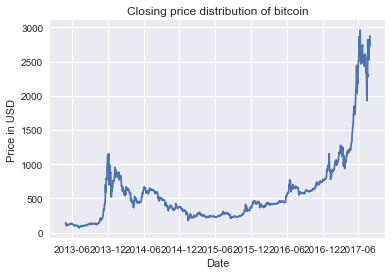

In [28]:
plt.plot(train2)
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.title("Closing price distribution of bitcoin")

In [34]:
ts= train2['Close']

In [46]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=7)
    rolstd = pd.rolling_std(timeseries, window=7)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7,center=False).mean()
  """
C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7,center=False).std()
  


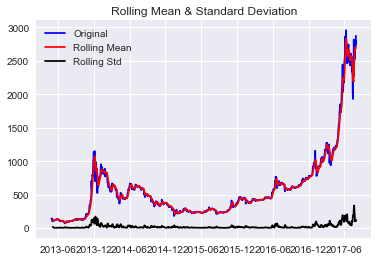

Results of Dickey-Fuller Test:
Test Statistic                    2.535589
p-value                           0.999060
#Lags Used                       24.000000
Number of Observations Used    1531.000000
Critical Value (1%)              -3.434628
Critical Value (5%)              -2.863430
Critical Value (10%)             -2.567776
dtype: float64


In [47]:
test_stationarity(ts)

The test statistic is very large compared to the crtical value. The above series show that rolling mean value varies with time and is not stationary. The series needs to be Stationarized. we need to eliminate the trend and seasonality from the series to make it stationary.

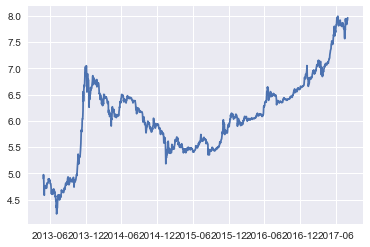

In [48]:
#Estimating&Eliminating Trend
#apply log transform
ts_log = np.log(ts)
plt.plot(ts_log)

C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7,center=False).mean()
  


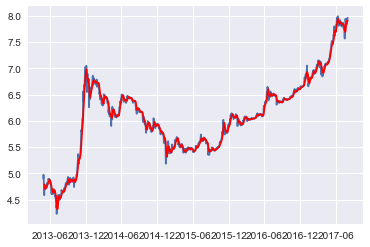

In [49]:
#Moving average
moving_avg = pd.rolling_mean(ts_log,7)
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [50]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(10)

Date
2013-04-28         NaN
2013-04-29         NaN
2013-04-30         NaN
2013-05-01         NaN
2013-05-02         NaN
2013-05-03         NaN
2013-05-04   -0.067168
2013-05-05   -0.016366
2013-05-06   -0.011951
2013-05-07    0.012392
Name: Close, dtype: float64

C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7,center=False).mean()
  """
C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7,center=False).std()
  


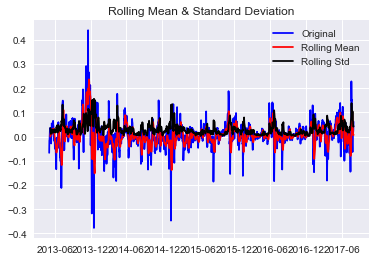

Results of Dickey-Fuller Test:
Test Statistic                -7.191326e+00
p-value                        2.499260e-10
#Lags Used                     2.200000e+01
Number of Observations Used    1.527000e+03
Critical Value (1%)           -3.434640e+00
Critical Value (5%)           -2.863435e+00
Critical Value (10%)          -2.567779e+00
dtype: float64


In [51]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(halflife=7,min_periods=0,adjust=True,ignore_na=False).mean()
  


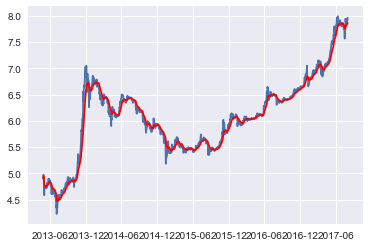

In [52]:
#exponentially weighted moving average
expwighted_avg = pd.ewma(ts_log, halflife=7)
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7,center=False).mean()
  """
C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7,center=False).std()
  


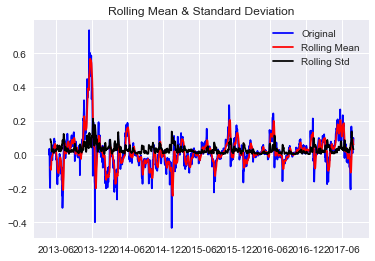

Results of Dickey-Fuller Test:
Test Statistic                   -5.442038
p-value                           0.000003
#Lags Used                       23.000000
Number of Observations Used    1532.000000
Critical Value (1%)              -3.434626
Critical Value (5%)              -2.863428
Critical Value (10%)             -2.567775
dtype: float64


In [53]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

Now the current time series is stationary,the TS (test_statistic) value is less than 1% critcal value. Since weights are assigned to values from the starting index.

## Remove trend and seasonality with decomposition

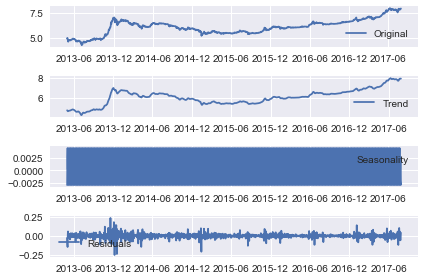

In [54]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7,center=False).mean()
  """
C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7,center=False).std()
  


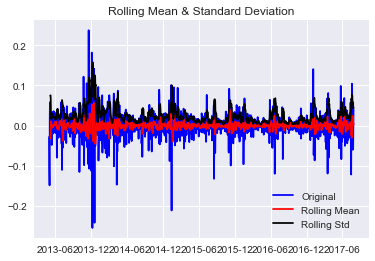

Results of Dickey-Fuller Test:
Test Statistic                -1.256779e+01
p-value                        2.035387e-23
#Lags Used                     2.300000e+01
Number of Observations Used    1.526000e+03
Critical Value (1%)           -3.434642e+00
Critical Value (5%)           -2.863436e+00
Critical Value (10%)          -2.567779e+00
dtype: float64


In [55]:
#Model the residual
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

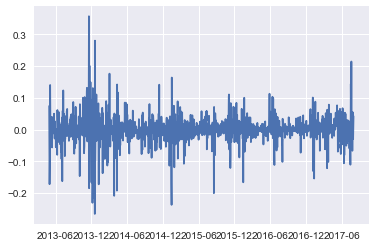

In [56]:
#Eliminating Trend and Seasonality
#Differencing – taking the differece with a particular time lag
#Decomposition – modeling both trend and seasonality and removing them from the model.

#Differencing
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7,center=False).mean()
  """
C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7,center=False).std()
  


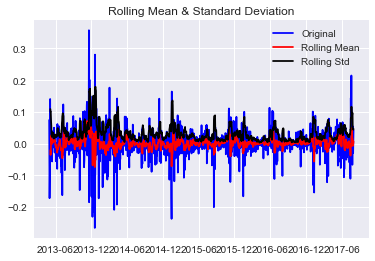

Results of Dickey-Fuller Test:
Test Statistic                -7.285034e+00
p-value                        1.466401e-10
#Lags Used                     2.200000e+01
Number of Observations Used    1.532000e+03
Critical Value (1%)           -3.434626e+00
Critical Value (5%)           -2.863428e+00
Critical Value (10%)          -2.567775e+00
dtype: float64


In [57]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

the graph is stationnary

In [58]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

In [59]:
lag_acf = acf(ts_log_diff, nlags=10)
lag_pacf = pacf(ts_log_diff, nlags=10, method='ols')

Text(0.5,1,'Autocorrelation Function')

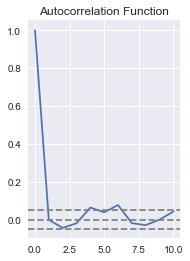

In [60]:
#Plot ACF:It is a measure of the correlation between the the TS with a lagged version of itself. For instance at lag 5, ACF would compare series at time instant ‘t1’…’t2’ with series at instant ‘t1-5’…’t2-5’ (t1-5 and t2 being end points) 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

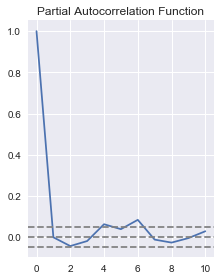

In [61]:
#Plot PACF:This measures the correlation between the TS with a lagged version of itself but after eliminating the variations already explained by the intervening comparisons
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

p – The lag value where the PACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case p=1.


q The lag value where the ACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case q=1

In [62]:
#We need to load the ARIMA model
from statsmodels.tsa.arima_model import ARIMA

Text(0.5,1,'RSS: 2.8138')

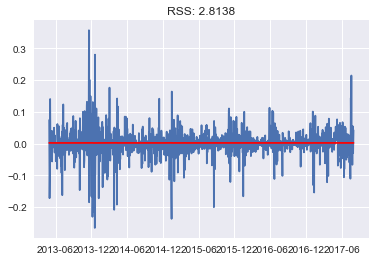

In [63]:
#AR Model
model = ARIMA(ts_log, order=(1, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

Text(0.5,1,'RSS: 2.8138')

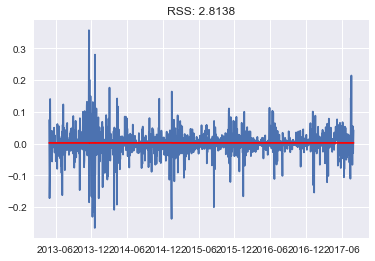

In [64]:
#Ma model
model = ARIMA(ts_log, order=(0, 1, 1))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

Here we can see that the AR and MA models have almost the same RSS

## Taking it back to original scale

In [72]:
predictions_ARIMA_diff = pd.Series(results_AR .fittedvalues, copy=True)
predictions_ARIMA_diff.head()

Date
2013-04-29    0.001971
2013-04-30    0.001892
2013-05-01    0.002016
2013-05-02    0.002162
2013-05-03    0.002089
dtype: float64

In [73]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

Date
2013-04-29    0.001971
2013-04-30    0.003862
2013-05-01    0.005878
2013-05-02    0.008040
2013-05-03    0.010129
dtype: float64

In [74]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Date
2013-04-28    4.899406
2013-04-29    4.901376
2013-04-30    4.903268
2013-05-01    4.905284
2013-05-02    4.907446
dtype: float64

Text(0.5,1,'RMSE: 564.0171')

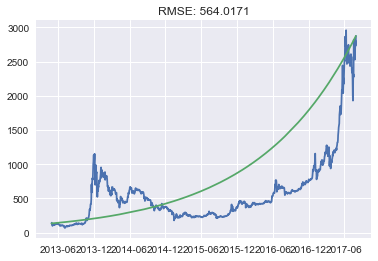

In [75]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(ts_log, order=(2,1,0))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.7f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))
plt.show()